# Quelques exemples simples d'utilisation d'OpenFisca

## Initialisation

Nous importons les modules nécéssaires et initialisons le système socio-fiscal.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances

In [3]:
import openfisca_france    # module décrivant le système socio-fiscal français
TaxBenefitSystem = openfisca_france.FranceTaxBenefitSystem  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

Nous pouvont lister les entités pertinentes du système socio-fiscal 

## Cas-types simples

In [4]:
print sorted(tax_benefit_system.entities)

[<class 'openfisca_core.entities.Individu'>, <class 'openfisca_core.entities.Foyer_Fiscal'>, <class 'openfisca_core.entities.Famille'>, <class 'openfisca_core.entities.Menage'>]


### Le cas d'une personne seule

Nous créons le scénario correspondant à un cas-type très simple où ils n'existent qu'une seule entitée pour chaque entité composite considérée (famille, foyer_fiscal ou ménage).  

In [5]:
year = 2014
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = year,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        salaire_de_base = 24000,
    )
    ).new_simulation()

Il est alors possible de calculer différentes variables, dont, à titre d'exemple, le revenu disponible.

In [6]:
simulation.calculate('revenu_disponible', period = year)

/home/benjello/openfisca/openfisca-core/openfisca_core/parameters.py:572: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.string_ == np.dtype(str).type`.
  if not np.issubdtype(key.dtype, np.str):


array([17694.723], dtype=float32)

Les variables représentant des montants "payés" par les ménages sont comptées négativement.   

In [7]:
simulation.calculate_add('cotisations_salariales', period = year)

array([-3372.], dtype=float32)

Il est possible de faire des opérations et de calculer le taux de cotisations salariales.

In [8]:
abs(sum(
    simulation.calculate_add(variable, period = year)
    for variable in [
        'cotisations_salariales',
        'csg_deductible_salaire',
        'csg_imposable_salaire',
        'crds_salaire'
        
        ]
    ) / simulation.calculate_add('salaire_de_base', period = year)
   )


array([0.2191], dtype=float32)

In [9]:
from openfisca_matplotlib import graphs

/home/benjello/openfisca/openfisca-core/openfisca_core/simulations.py:212: Warning: The simulation.get_holder method has been deprecated. Please use entity.get_holder instead.
  Warning
/home/benjello/openfisca/openfisca-matplotlib/openfisca_matplotlib/graphs.py:188: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)


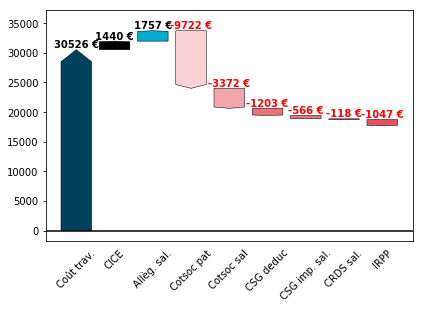

In [10]:
graphs.draw_waterfall(
    simulation = simulation,
    )

### Le cas d'un couple biactif

In [11]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        salaire_de_base = 24000,
    ),
    parent2 = dict(
        date_naissance = date(1980, 1, 1),
        salaire_de_base = 24000,
        )
    ).new_simulation()

In [12]:
simulation.calculate_add('salaire_net', period = year)

array([18741.6, 18741.6], dtype=float32)

In [13]:
simulation.calculate('revenu_disponible', period = year)

array([32632.588], dtype=float32)

In [14]:
simulation.calculate('irpp', period = year)

array([-4850.612], dtype=float32)

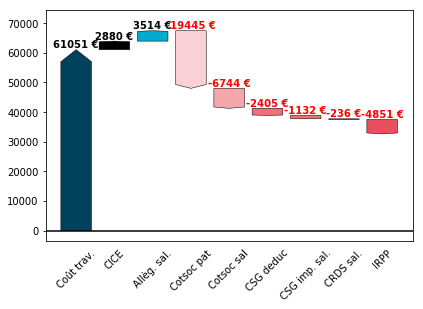

In [15]:
graphs.draw_waterfall(
    simulation = simulation,
    )

### Le cas d'un couple biactif avec enfants

In [16]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        salaire_de_base = 24000,
        ),
    parent2 = dict(
        date_naissance = date(1980, 1, 1),
        salaire_de_base = 24000,
        ),
    enfants = [
        dict(date_naissance = date(2014 - 9, 1, 1)),
        dict(date_naissance = date(2014 - 9, 1, 1)),
        ],
).new_simulation()
    

In [17]:
simulation.calculate('revenu_disponible', period = year)

array([37576.332], dtype=float32)

In [18]:
simulation.calculate_add('af', period = year)

array([1557.5399], dtype=float32)

In [19]:
simulation.calculate('irpp', period = year)

array([-2181.8777], dtype=float32)

In [20]:
simulation.calculate('ars', period = year)

array([728.9032], dtype=float32)

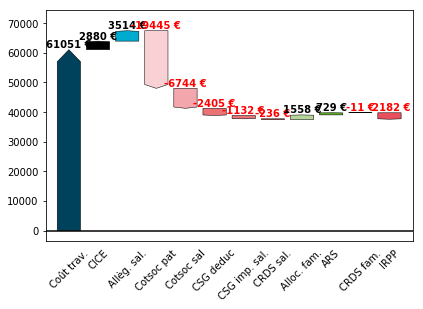

In [21]:
graphs.draw_waterfall(
    simulation = simulation,
    )

## Cas types dont on fait varier certaines caractéristiques

### Cas d'une personne seule dont on fait varier le salaire

In [22]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 10,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2014,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
    )
    ).new_simulation()

/home/benjello/openfisca/openfisca-matplotlib/openfisca_matplotlib/graphs.py:233: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  axes.hold(True)


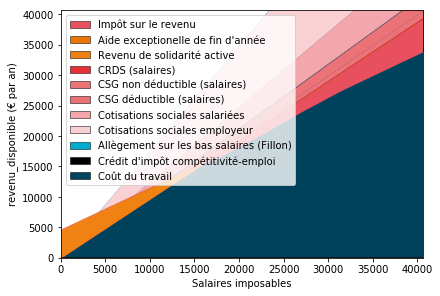

In [23]:
graphs.draw_bareme(
    simulation = simulation,
    x_axis = "salaire_imposable",
    legend_position = 2,
    )